In [4]:
from backend.return_period_metrics import _true_positives_fraction_in_window
import numpy as np

a = pd.DataFrame([1,1,1,1,1,1,1,1,0,0])
b = pd.DataFrame([0,0,1,1,0,0,0,0,0,0])
precision = _true_positives_fraction_in_window(
        a, b, True, 2
    )
precision

0.75

In [1]:
import pandas as pd
import os
from sklearn.metrics import r2_score
from backend.return_period_metrics import calculate_return_period_performance_metrics
from tqdm import tqdm
root = r'D:\RR-Former\runs\TFRN_noATTR_[[372-7-57-128][365-1-128][-7-256-128]-0.2]_daymet671_1980~1995#1995~2000#2000~2014_372_365_7_57_1]_QLoss_n100_bs512_lr0.001_warm_up_seedNone\pretrain_test_single'

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\cyh\\global_streamflow_model_paper-main\\global_streamflow_model_paper-main\\metadata\\naturalearth_lowres.geojson'

In [22]:
def save_period(root=root):
    data_path = r'E:\cyh\global_streamflow_model_paper-main\global_streamflow_model_paper-main\Model\result\TSF_forcast'

    all_dt = pd.DataFrame([])
    
    for file in tqdm(os.listdir(data_path)):
        if file.endswith(".csv") and not file == 'return_period.csv':
            data_file = os.path.join(data_path, file)
            basin = file.split(".")[0]

            hydro_series = pd.read_csv(data_file, index_col=0)
            hydro_series.columns = ['qobs', 'qsim', 'month', 'day',"weekend", 'year']

            time_df = hydro_series[['month', 'day', 'year']]
            indx = pd.to_datetime(time_df)
            hydro_series.index = indx.astype("str")

            obs_series = hydro_series.iloc[:, 0]
            sim_seres = hydro_series.iloc[:, 1]
            
            r2 = r2_score(obs_series,sim_seres)
            nse = calc_nse(obs_series,sim_seres)
            mse = calc_mse(obs_series,sim_seres)
            bias = calc_bias(obs_series,sim_seres)
            r2s.append(r2)
            nses.append(nse)
            mses.append(mse)
            biass.append(bias)
            
#             try:
#                 dt = calculate_return_period_performance_metrics(observations=obs_series,
#                                                                  predictions=sim_seres,
#                                                                  temporal_resolution="1D")
#             except:
#                 continue
#             df1 = pd.DataFrame(dt[0], index=[basin])
#             df2 = pd.DataFrame(dt[1], index=[basin])

#             df = pd.concat([df1, df2], axis=1)
#             all_dt = pd.concat([all_dt, df])
#     print(all_dt.sum()/len(all_dt))
#     display(all_dt.median())
    
#     save_path = os.path.join(data_path, "return_period.csv")
#     if os.path.exists(save_path):
#         os.remove(save_path)
#         all_dt.to_csv(save_path)
#     else:
#         all_dt.to_csv(save_path)
    print(f"r2:{np.mean(r2s)},MSE:{np.mean(mses)},NSE:{np.mean(nses)},BIAS:{np.mean(biass)}")
    print(f"r2:{np.median(r2s)},MSE:{np.median(mses)},NSE:{np.median(nses)},BIAS:{np.median(biass)}")
    
    return r2s
r2s = save_period()

100%|███████████████████████████████████████████████████████████████████████████████| 149/149 [00:00<00:00, 151.73it/s]

r2:-201.53111315672507,MSE:11.283230332244823,NSE:-201.53111315672507,BIAS:18.759750810290836
r2:-0.4981017423334855,MSE:4.965328426088739,NSE:-0.4981017423334855,BIAS:1.657248517260738


In [14]:
import pandas as pd
import os
from sklearn.metrics import r2_score
from backend.return_period_metrics import calculate_return_period_performance_metrics
from tqdm import tqdm

def metric_cal(path):
    data_path = path
    all_dt = pd.DataFrame([])
    r2s,nses = [], []

    for file in tqdm(os.listdir(data_path)):
        if file.endswith(".csv") and not file == 'return_period.csv':
            data_file = os.path.join(data_path, file)
            basin = file.split(".")[0]

            hydro_series = pd.read_csv(data_file, index_col=0)
            hydro_series.columns = ['qobs', 'qsim', 'month', 'day',"weekend", 'year']

            time_df = hydro_series[['month', 'day', 'year']]
            indx = pd.to_datetime(time_df)
            hydro_series.index = indx.astype("str")

            obs_series = hydro_series.iloc[:, 0]
            sim_seres = hydro_series.iloc[:, 1]
            r2 = r2_score(obs_series,sim_seres)
            nse = calc_nse(obs_series.values,sim_seres.values)
            r2s.append(r2)
            nses.append(nse)
    return nses

In [20]:
root = r'E:\cyh\global_streamflow_model_paper-main\global_streamflow_model_paper-main\Model\result'

all_path = [os.path.join(root,name) for name in os.listdir(root)]
for path in all_path[31:]:
    nses = metric_cal(path)
    print(path.split("\\")[-1])
    print("nse_mean:{}".format(np.mean(nses)))
    print("nse_median:{}".format(np.median(nses)))

100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 45.12it/s]


param_ED
nse_mean:-13.345391508817412
nse_median:-2.9448555622525605


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:08<00:00, 55.22it/s]


patch
nse_mean:-0.4031312907089912
nse_median:-0.16730297205364786


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 45.98it/s]


prelen1_EALSTM
nse_mean:-0.6693747225728598
nse_median:-0.6693747225728599


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.82it/s]


prelen1_EALSTM_37
nse_mean:-6.2003339142973655
nse_median:-6.2003339142973655


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 45.56it/s]


prelen1_EALSTM_38
nse_mean:-581.2494434455988
nse_median:-15.40586524621251


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 45.39it/s]


prelen1_EALSTM_att
nse_mean:-0.7595491364604305
nse_median:-0.7595491364604308


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.52it/s]


prelen1_EDLSTM
nse_mean:-0.538505696292427
nse_median:-0.03363748933587918


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.88it/s]


prelen1_EE_former
nse_mean:-1.1481768120802305
nse_median:-1.148176812080231


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.62it/s]


prelen1_MTLLSTM
nse_mean:-1.0382259671104244
nse_median:-1.038225967110424


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.20it/s]


prelen1_MTLLSTM_101
nse_mean:-0.10829178930448125
nse_median:-0.10829178930448125


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.72it/s]


prelen7_EALSTM
nse_mean:-20.253677513042224
nse_median:-20.253677513042224


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.75it/s]


prelen7_EDLSTM
nse_mean:-146.00099281988582
nse_median:-146.00099281988588


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.77it/s]


Repr_try
nse_mean:-4.54731958830936
nse_median:-0.06824005138326239


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:13<00:00, 34.91it/s]


slstm
nse_mean:-12.651417605733965
nse_median:0.047274622511335684


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 45.63it/s]


time-grad
nse_mean:-0.36883439305340476
nse_median:-0.011949896675179539


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.53it/s]


time-grad-EA
nse_mean:-2869046467697475.0
nse_median:-8758782859917.288


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.62it/s]


time-grad_aux
nse_mean:-37.035575579727094
nse_median:-0.22248920915375325


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:07<00:00, 61.02it/s]


TimesNet
nse_mean:-0.9876632525048435
nse_median:-0.2689028215717977


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:07<00:00, 65.12it/s]


Ts-unet
nse_mean:0.05359601050444738
nse_median:0.0664449770760221


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.94it/s]


TSunet-deep
nse_mean:-0.029843225095029034
nse_median:0.08830979157843949


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.61it/s]


TSunet-state
nse_mean:-0.23755087178452824
nse_median:0.038194612576390174


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:07<00:00, 63.07it/s]


tsunet_finetune
nse_mean:-0.6145795641217766
nse_median:-0.10919935927067415


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:11<00:00, 41.27it/s]


Unet
nse_mean:0.7033422762293755
nse_median:0.7241809491778707


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 45.73it/s]


Unet_adjust
nse_mean:-1.0208874553355305
nse_median:-0.0973420706770457


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 46.61it/s]


VAE
nse_mean:0.4713996482297065
nse_median:0.4713996482297067


100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:10<00:00, 45.10it/s]

延迟一天EALSTM
nse_mean:-59.74007505931706
nse_median:-59.74007505931706


In [17]:
import numpy as np

x = np.random.rand(60,5)
y = np.arange(60)[:,None]


def reshape_data(x: np.ndarray, y: np.ndarray, seq_length: int, past_len: int) :
    num_samples, num_features = x.shape

    x_new = np.zeros((num_samples - seq_length + 1, seq_length, num_features))
    y_new = np.zeros((num_samples - seq_length + 1, past_len, 1))

    for i in range(0, x_new.shape[0]):
        x_new[i, :, :num_features] = x[i:i + seq_length, :]
        y_new[i, :, :] = y[i + seq_length - 1, 0]

    return x_new, y_new
seq_length=30
past_len=7
num_samples, num_features = x.shape

x_new = np.zeros((num_samples - seq_length + 1, seq_length, num_features))
y_new = np.zeros((num_samples - seq_length + 1, past_len, 1))

for i in range(0, x_new.shape[0]):
    x_new[i, :, :num_features] = x[i:i + seq_length, :]
    y_new[i, :, :] = y[i + seq_length - past_len-1:i + seq_length - 1, :]

In [32]:
import torch

x = torch.rand(4,20,1)
# torch.mean(x,dim=1).shape
len(x.shape)

3

In [33]:
data_file = r'E:\cyh\global_streamflow_model_paper-main\global_streamflow_model_paper-main\Model\result\Mulscale-gmm\01365000.csv'

hydro_series = pd.read_csv(data_file, index_col=0)
hydro_series.columns = ['qobs', 'qsim', 'month', 'day',"weekend", 'year']

time_df = hydro_series[['month', 'day', 'year']]
indx = pd.to_datetime(time_df)
hydro_series.index = indx.astype("str")

obs_series = hydro_series.iloc[:, 0]
sim_seres = hydro_series.iloc[:, 1]

dt = calculate_return_period_performance_metrics(observations=obs_series, predictions=sim_seres,
                                                     temporal_resolution="1D")
dt

({'return_period_1.01_window_0.0_precision': 0.0,
  'return_period_1.01_window_0.0_recall': 0,
  'return_period_1.01_window_1.0_precision': 0.0,
  'return_period_1.01_window_1.0_recall': 0,
  'return_period_1.01_window_2.0_precision': 0.0,
  'return_period_1.01_window_2.0_recall': 0,
  'return_period_2_window_0.0_precision': 0.15384615384615385,
  'return_period_2_window_0.0_recall': 0.18181818181818182,
  'return_period_2_window_1.0_precision': 0.38461538461538464,
  'return_period_2_window_1.0_recall': 0.45454545454545453,
  'return_period_2_window_2.0_precision': 0.38461538461538464,
  'return_period_2_window_2.0_recall': 0.45454545454545453,
  'return_period_5_window_0.0_precision': 0.0,
  'return_period_5_window_0.0_recall': 0.0,
  'return_period_5_window_1.0_precision': 0.0,
  'return_period_5_window_1.0_recall': 0.0,
  'return_period_5_window_2.0_precision': 0.0,
  'return_period_5_window_2.0_recall': 0.0,
  'return_period_10_window_0.0_precision': 0.0,
  'return_period_10_windo

In [17]:
import numpy as np
import pandas as pd
import os
from backend.return_period_metrics import calculate_return_period_performance_metrics
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [20]:
from backend import data_paths
from backend import evaluation_utils
from backend import gauge_groups_utils
from backend import loading_utils
from backend import metrics_utils
from backend import return_period_metrics
from backend.return_period_calculator import return_period_calculator
_DEFAULT_PLOTTING_RETURN_PERIODS = np.array([1.01, 2, 5, 10, 20, 50, 100])
temporal_resolution="1D"

In [13]:
# observations=obs_series
# predictions=sim_seres

In [62]:
#生成标签文件
root_path = r'E:\cyh\water_data\Caravan\timeseries\csv\camels'
save_path = r'E:\cyh\water_data\Caravan\timeseries\label\camels'
for file in tqdm(os.listdir(root_path)):
    data_file = os.path.join(root_path,file)
    basin = file.split(".")[0]
    df = pd.read_csv(data_file)
    df.index = pd.to_datetime(df.date)
    df = df.truncate(before='1981-01-01',after="2014-12-31")
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')

    calculator = return_period_calculator.ReturnPeriodCalculator(
                hydrograph_series=df.iloc[:,-1],
                hydrograph_series_frequency=temporal_resolution,
                use_simple_fitting=True,
                verbose=False,
            )
    #设定异常的阈值
#     threshold = calculator.flow_value_from_return_period(np.array([2.01]))
#     df["label"] = (df.iloc[:,-1] > threshold[0]).astype("int")
    df["label"] = df["streamflow"].apply(score).astype("int")
    result = pd.get_dummies(df["label"],columns=[1,2,3,4]).astype('int').reindex(columns=[0,1,2,3,4], fill_value=0)
    save_file = os.path.join(save_path,f"{basin}.csv")
    result.to_csv(save_file)

100%|████████████████████████████████████████████████████████████████████████████████| 482/482 [05:03<00:00,  1.59it/s]


In [30]:
def score(x):
    if x < calculator.flow_value_from_return_period(np.array([1.01])):
        return 0
    elif x > calculator.flow_value_from_return_period(np.array([1.01])):
        return 1
    elif x > calculator.flow_value_from_return_period(np.array([2.01])):
        return 2
    elif x > calculator.flow_value_from_return_period(np.array([5.01])):
        return 3
    elif x > calculator.flow_value_from_return_period(np.array([10.01])):
        return 4


In [44]:
#sim_seres or obs_series
calculator = return_period_calculator.ReturnPeriodCalculator(
            hydrograph_series=obs_series,
            hydrograph_series_frequency=temporal_resolution,
            use_simple_fitting=True,
            verbose=False,
        )

In [45]:
calculator.flow_value_from_return_period(np.array([1.01]))

array([0.15494431])

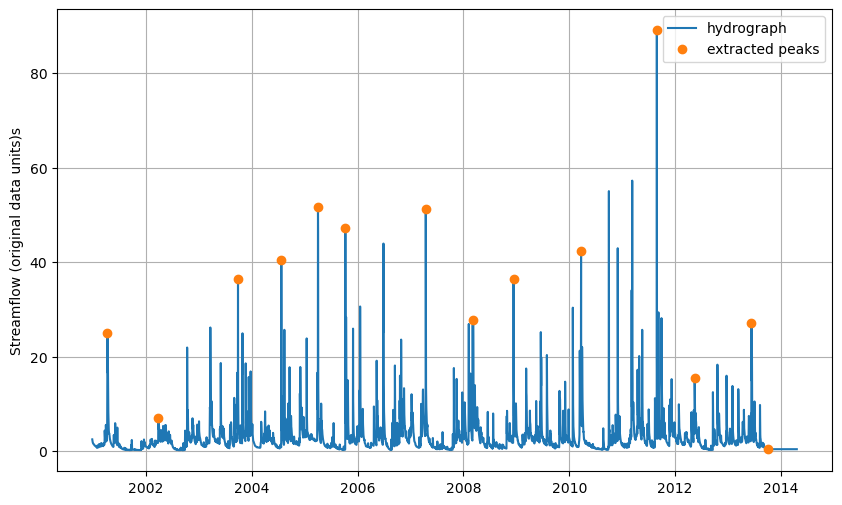

In [46]:
calculator.plot_hydrograph_with_peaks()

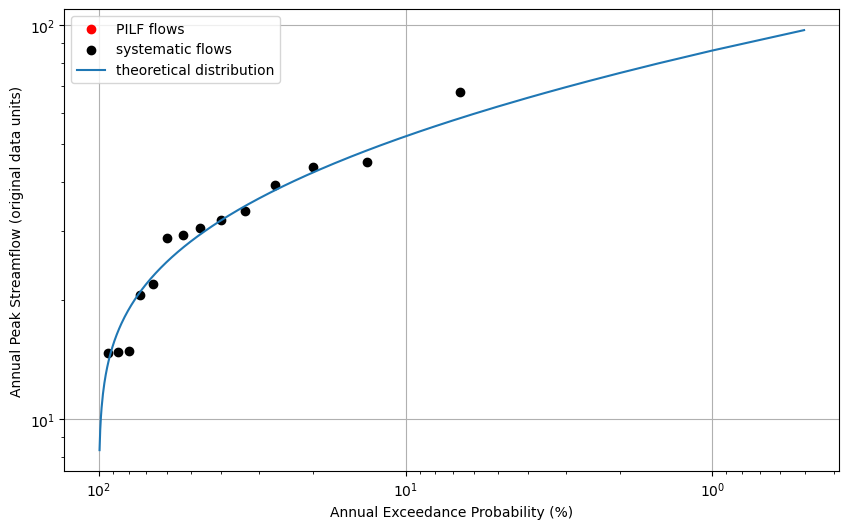

In [41]:
calculator.plot_exceedence_probability_distribution()

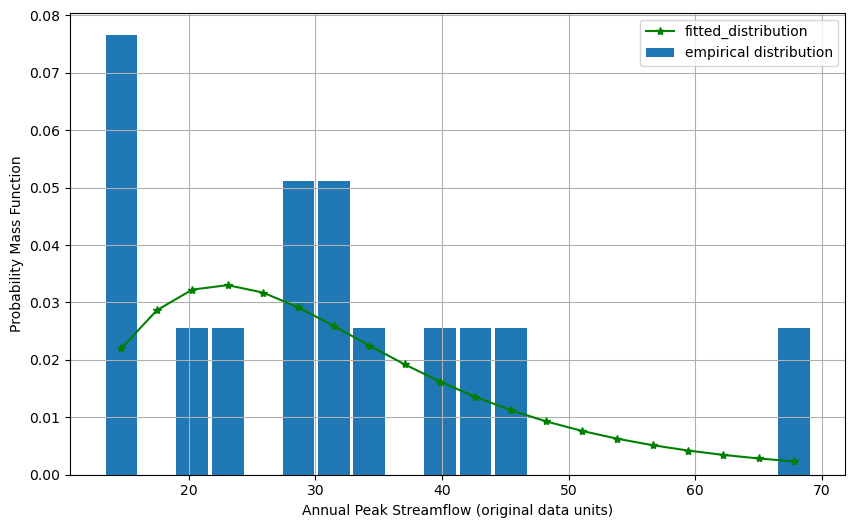

In [42]:
calculator.plot_fitted_distribution()